# <p style="background-color:#583759;font-family:newtimeroman;color:#D2B48C;font-size:150%;text-align:center;border-radius:10px 10px;">TELECOM CUSTOMER CHURN</p>


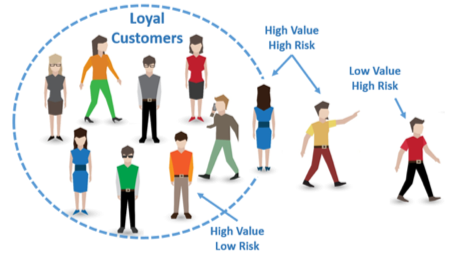

<a id="toc"></a>

## <h3 style="background-color:#583759; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;" class="list-group-item list-group-item-action active" data-toggle="list" role="tablist" aria-controls="home">TABLE OF CONTENTS</h3>

* [1) Importing Basic Libraries](#1)
* [2) Importing Data and Cleaning](#2)
* [3) Data Visualization](#3)
* [4) Feature Engineering](#4)
    * [4.1 - Generating New Features](#4.1)
    * [4.2 - Label Encoding](#4.2)
    * [4.3 - One Hot Encoding](#4.3)
    * [4.4 Feature Scaling - Min Max Scaler](#4.4)
* [5) Correlation Analysis](#5)       
* [6) 6 - Splitting Data - Train Test Split](#6)        
* [7) Model Evaluation Metrics](#7)
    * [7.1 Importing Features](#7.1)
    * [7.2 Function1 - Feature Weight](#7.2)
    * [7.3 Function2 - Confusion Matrix](#7.3)
    * [7.4 Function2 - ROC Curve and AUC Score](#7.4)
    * [7.5 Function4 - Precision Recall curve, F1 Score, AUC Score](#7.5)
* [8) Model Building](#8)
 * [8.1 K Nearest Neighbors](#8.1)
 * [8.2 Logistic Regression](#8.2)
 * [8.3 Random Forest Classifier](#8.3)
 * [8.4 Support Vector Machine](#8.4)
* [9) Model Improvement](#9)
 * [9.1 K Nearest Neighbors - Tuned](#9.1)
 * [9.2 Logistic Regression - Tuned](#9.2)
 * [9.3 Random Forest Classifier - Tuned](#9.3)
 * [9.4 Support Vector Machine - Tuned](#9.4)
* [10 Summary](#10)

<a id="1"></a>
## <p style="background-color:#583759; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;"> 1. Importing Basic Libraries</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id="2"></a>
## <p style="background-color:#583759; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;">2. Importing Data & Cleaning</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [2]:
# loading dataset

telecom_df = pd.read_csv('churn.csv')

In [3]:
# viewing data 

telecom_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,CallService,MultipleConnections,InternetConnection,OnlineSecurity,...,DeviceProtectionService,TechnicalHelp,OnlineTV,OnlineMovies,Agreement,BillingMethod,PaymentMethod,MonthlyServiceCharges,TotalAmount,Churn
0,2907-ILJBN,Female,0.0,Yes,Yes,11.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.60,233.90,No
1,3896-RCYYE,Female,0.0,No,No,67.0,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Credit card,53.40,3579.15,No
2,9764-REAFF,Female,0.0,Yes,No,59.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer,18.40,1057.85,No
3,6651-RLGGM,Male,0.0,Yes,Yes,67.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,26.30,1688.90,No
4,5879-SESNB,Female,0.0,No,No,11.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,75.25,888.65,No


In [4]:
# summary of dataset 

telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12335 entries, 0 to 12334
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               12335 non-null  object 
 1   gender                   12335 non-null  object 
 2   SeniorCitizen            12335 non-null  float64
 3   Partner                  12335 non-null  object 
 4   Dependents               12335 non-null  object 
 5   tenure                   12335 non-null  float64
 6   CallService              12335 non-null  object 
 7   MultipleConnections      12335 non-null  object 
 8   InternetConnection       12335 non-null  object 
 9   OnlineSecurity           12335 non-null  object 
 10  OnlineBackup             12335 non-null  object 
 11  DeviceProtectionService  12335 non-null  object 
 12  TechnicalHelp            12335 non-null  object 
 13  OnlineTV                 12335 non-null  object 
 14  OnlineMovies          

In [5]:
# statistical information on numerical features

telecom_df.describe()

,SeniorCitizen,tenure,MonthlyServiceCharges,TotalAmount
count,12335.000000,12335.000000,12335.000000,12335.000000
mean,0.157254,29.531543,61.502934,2032.263356
std,0.349871,23.342738,28.673113,2120.078007
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,8.000000,33.886556,352.743728
50%,0.000000,24.000000,64.364917,1209.250000
75%,0.000000,49.000000,85.000000,3168.750000
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
# Loop to get unique values

for i in telecom_df.columns:
    print(f'unique values in column "{i}" is \n {telecom_df[i].value_counts()} ')
    print('----------------------------------------------------------')

unique values in column "customerID" is 
 1038-ZAGBI    104
4464-JCOLN     86
0516-VRYBW     69
2667-WYLWJ     66
3506-LCJDC     65
             ... 
3892-NXAZG      1
4500-HKANN      1
5248-KWLAR      1
2545-LXYVJ      1
1680-VDCWW      1
Name: customerID, Length: 5590, dtype: int64 
----------------------------------------------------------
unique values in column "gender" is 
 Female    6216
Male      6119
Name: gender, dtype: int64 
----------------------------------------------------------
unique values in column "SeniorCitizen" is 
 0.000000    10016
1.000000     1566
0.154605        1
0.561906        1
0.153040        1
            ...  
0.423915        1
0.172212        1
0.884045        1
0.500818        1
0.305684        1
Name: SeniorCitizen, Length: 755, dtype: int64 
----------------------------------------------------------
unique values in column "Partner" is 
 Yes    6230
No     6105
Name: Partner, dtype: int64 
----------------------------------------------------------

In [7]:
# loop for checking data type of unique values

for i in telecom_df.columns:
    print (f'{i} : {telecom_df[i].unique()} \n "{telecom_df[i].dtype}"')
    print('-----------------------------------------')

customerID : ['2907-ILJBN' '3896-RCYYE' '9764-REAFF' ... '6894-LFHLY' '0639-TSIQW'
 '8361-LTMKD'] 
 "object"
-----------------------------------------
gender : ['Female' 'Male'] 
 "object"
-----------------------------------------
SeniorCitizen : [0.         1.         0.5632268  0.42858883 0.52834878 0.59327852
 0.79696507 0.93627326 0.1344534  0.20990739 0.90949486 0.96391889
 0.49539016 0.27809836 0.23650948 0.47279928 0.87639983 0.14882965
 0.70034205 0.38426984 0.65266454 0.72238255 0.76772846 0.36486108
 0.08234054 0.45099365 0.90450648 0.21170374 0.48336045 0.81159254
 0.1415199  0.62703472 0.9755839  0.78130564 0.07205834 0.05657654
 0.11700096 0.8914037  0.27076239 0.57548262 0.29460722 0.95226879
 0.05671457 0.04272096 0.2443125  0.22477562 0.11308228 0.1913087
 0.57940295 0.21299665 0.97984444 0.50124795 0.93933844 0.18008267
 0.20028951 0.56212957 0.34546586 0.23392375 0.20997815 0.29267974
 0.6041458  0.97539268 0.51916053 0.31928784 0.06405092 0.07618527
 0.51983924 0.791

In [8]:
# No of rows and columns in dataset

telecom_df.shape

(12335, 21)

In [9]:
# check for null values

telecom_df.isnull().sum()

customerID                 0
gender                     0
SeniorCitizen              0
Partner                    0
Dependents                 0
tenure                     0
CallService                0
MultipleConnections        0
InternetConnection         0
OnlineSecurity             0
OnlineBackup               0
DeviceProtectionService    0
TechnicalHelp              0
OnlineTV                   0
OnlineMovies               0
Agreement                  0
BillingMethod              0
PaymentMethod              0
MonthlyServiceCharges      0
TotalAmount                0
Churn                      0
dtype: int64

In [10]:
# list of all the columns in dataset

telecom_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'CallService', 'MultipleConnections', 'InternetConnection',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionService',
       'TechnicalHelp', 'OnlineTV', 'OnlineMovies', 'Agreement',
       'BillingMethod', 'PaymentMethod', 'MonthlyServiceCharges',
       'TotalAmount', 'Churn'],
      dtype='object')


<a id="3"></a>
## <p style="background-color:#583759; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;">3. Data Visualization</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [12]:
# Setting standard styles for graphs

sns.set_style("dark")
sns.set_palette("rocket")

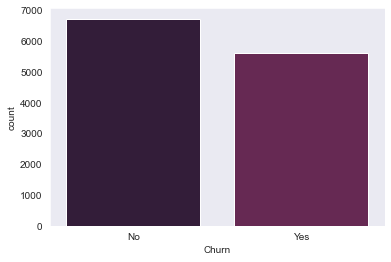

In [13]:
# visualization 1 - Churn yes/no

sns.countplot(x = telecom_df.Churn);

* Inference - No major class imbalance observed between churners and non churners 

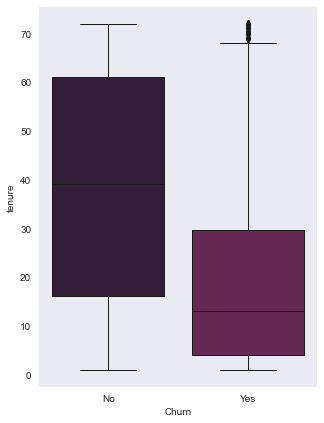

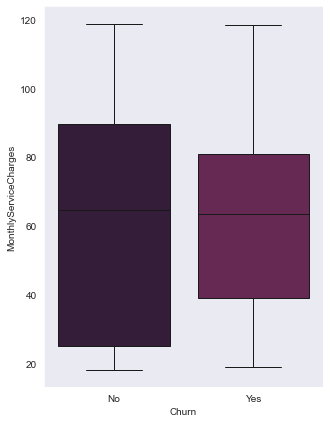

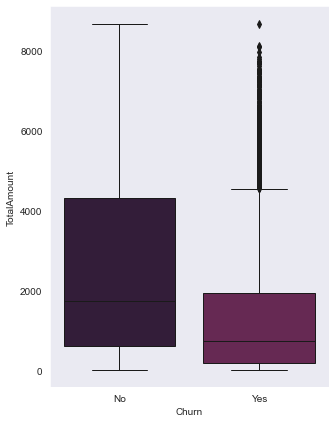

In [14]:
# Visualization 2 - Boxplot for churn

for i in ['tenure', 'MonthlyServiceCharges', 'TotalAmount']:
    plt.figure(figsize=(5,7))
    sns.boxplot(x=telecom_df.Churn, y=telecom_df[i], data=telecom_df , linewidth=1)
    plt.show()

### Inference:
1. Churning customers have a lower tenure of median ~ 18 months compared to 58 months for non churners
2. No significant difference observed in monthly charges observed for churners and non churners

In [15]:
# Function to group object and int data type columns
object_col=[]
num_col=[]
for i in telecom_df.columns:
    if telecom_df[i].dtype == 'object':
        object_col.append(i)
    else:
        num_col.append(i)

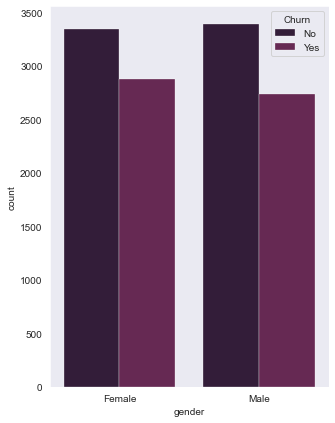

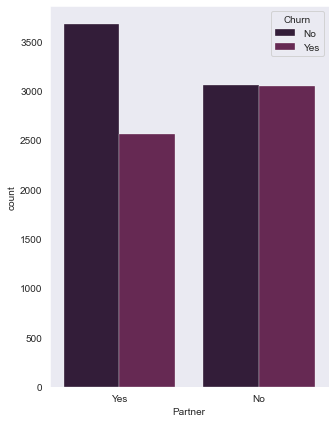

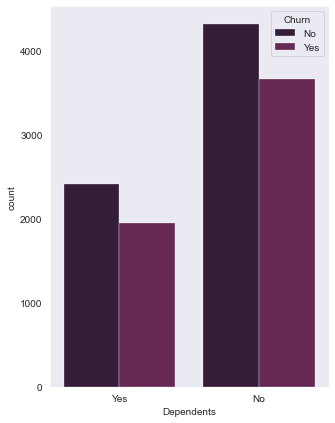

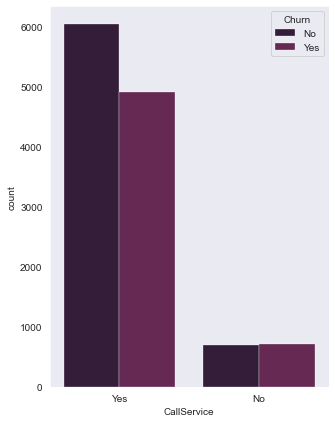

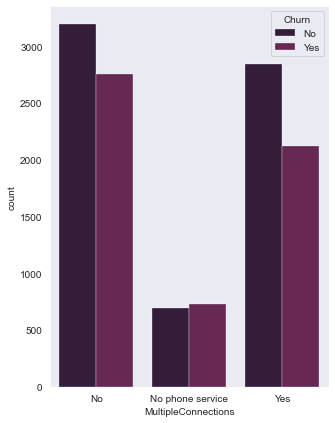

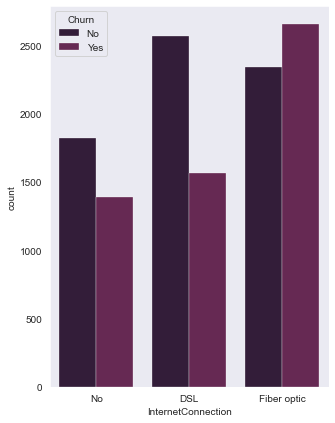

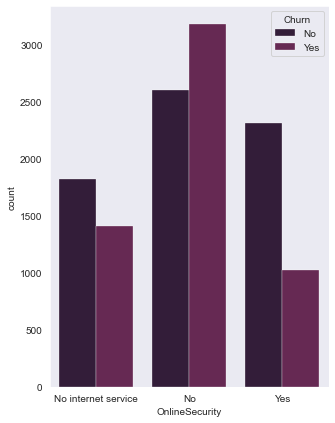

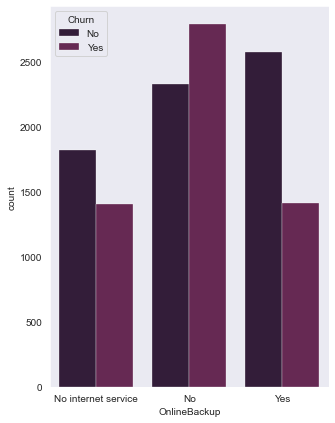

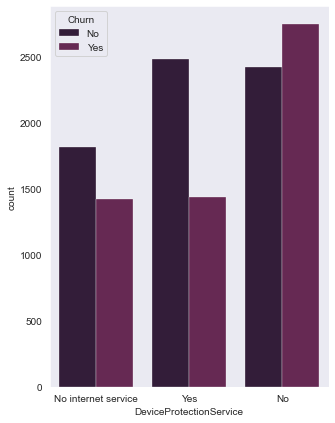

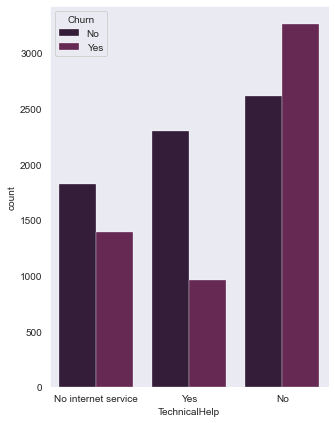

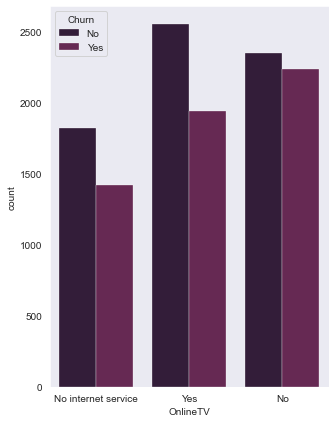

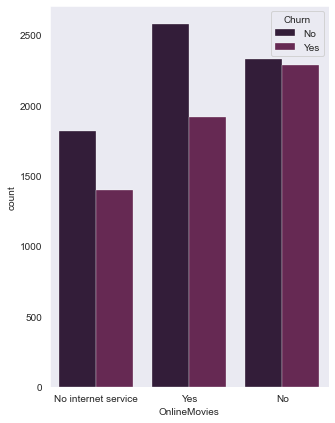

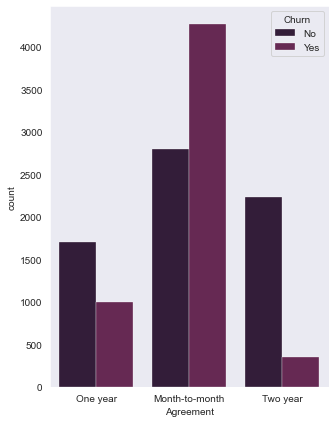

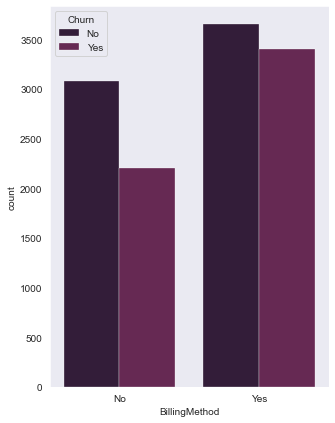

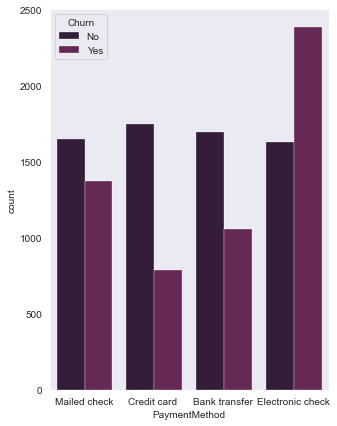

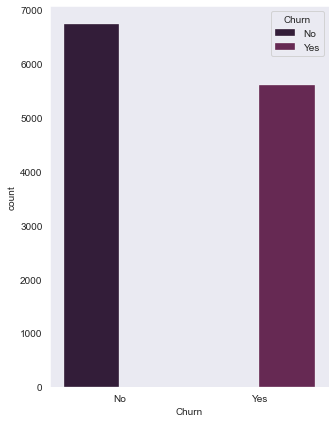

In [16]:
# Visualization 3 - Churn accross various columns
for i in object_col:
    plt.figure(figsize=(5,7))
    sns.countplot(x=telecom_df[i], hue=telecom_df.Churn, data=telecom_df , linewidth=0.3)
    plt.show()

### Inference - 
1. Gender does effect the churn rate; male and female has similar churners and non churners
2. Customers with partners have high churn rate compareatively
3. Customers without dependents have a high churn rate than those with dependents
4. Customers without online security have a very high churn rate
5. Customers in a month to month agreement have a very high churn rate

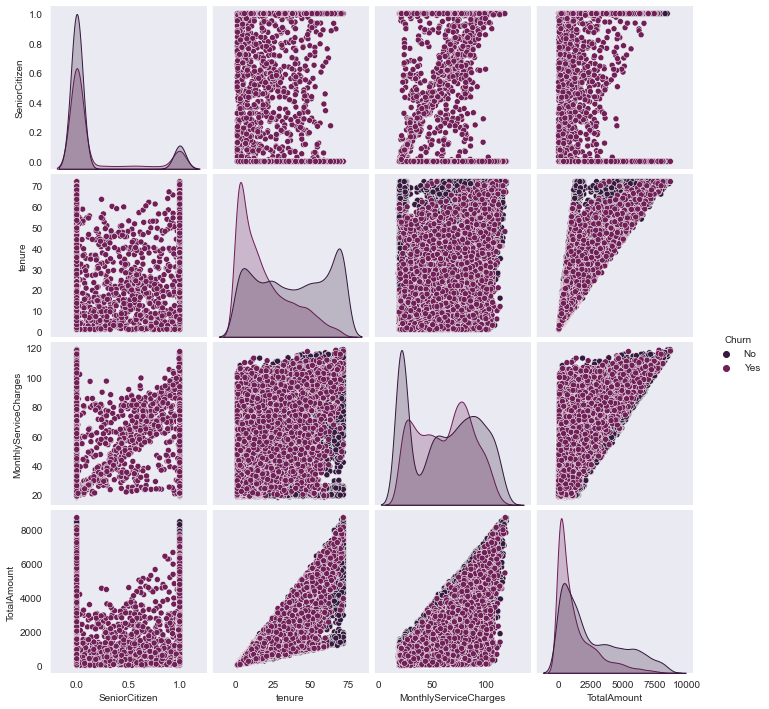

In [17]:
#Visualization 4 - Density plot for Churn
sns.pairplot(telecom_df, hue='Churn');


<a id="4"></a>
## <p style="background-color:#583759; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;">4. Feature Enginneering</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>


<a id="4.1"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">4.1 Generating New Features</p>



In [18]:
# Generating new feature - NumberofAdditionalServices

telecom_df['NumberofAdditionalServices'] = (telecom_df[['OnlineSecurity', 'OnlineBackup', 
                                                        'DeviceProtectionService', 
                                                        'OnlineTV', 'OnlineMovies']] == 'Yes').sum(axis =1)

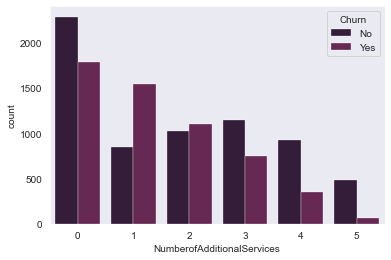

In [19]:
# Visualization 5 - Countplot for  NumberofAdditionalServices

sns.countplot(x=telecom_df['NumberofAdditionalServices'], 
              hue=telecom_df.Churn, data=telecom_df , linewidth=0.3);

<a id="4.2"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">4.2 Label Encoding</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [20]:
# Label Encoding for identified columns - 

features_le = ['gender', 'Partner','Dependents','Churn','BillingMethod','CallService']

def label_encoding(features, telecom_df):
    for i in features:
        telecom_df[i] = telecom_df[i].map({'Yes': 1, 'No' : 0})
    return

label_encoding(['Partner','Dependents','Churn','BillingMethod','CallService'], telecom_df)
telecom_df['gender'] = telecom_df['gender'].map({'Female' : 1, 'Male': 0})


<a id="4.3"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">4.3 One Hot Encoding</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [21]:
# One Hot Encoding
features_ohe = ['MultipleConnections', 'InternetConnection',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionService',
                'TechnicalHelp', 'OnlineTV', 'OnlineMovies','Agreement',
                'PaymentMethod', 'NumberofAdditionalServices']

telecom_df = pd.get_dummies(telecom_df, columns = features_ohe)



<a id="4.4"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">4.4  Feature Rescaling: Min Max Scaling</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [22]:
# Feature Rescaling - Min Max Scaling

from sklearn.preprocessing import MinMaxScaler

features_mms = ['tenure','MonthlyServiceCharges', 'TotalAmount']
telecom_df_features_mms = pd.DataFrame(telecom_df , columns = features_mms)
telecom_df_remaining_features = telecom_df.drop(columns=features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(telecom_df_features_mms)

rescaled_features = pd.DataFrame(rescaled_features, columns = features_mms,
                                index =  telecom_df_remaining_features.index)
telecom_df = pd.concat([telecom_df_remaining_features, rescaled_features],
                       axis = 1)


<a id="5"></a>
## <p style="background-color:#583759; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;">5. Correlation Analysis</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

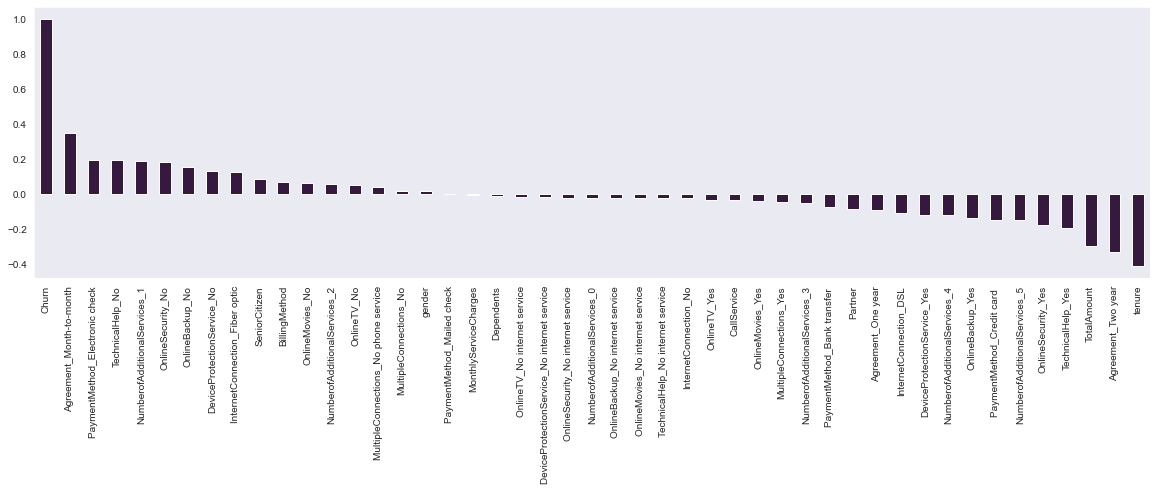

In [23]:
# Correlation Analysis - Correlation of churn with all remaining features

plt.figure(figsize = (16,10))
telecom_df.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar', figsize = (20,5));


<a id="6"></a>
## <p style="background-color:#583759; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;">6. Splitting Data - Train & Test Split</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [11]:
#removing unnecessary column

telecom_df.drop(['customerID'],inplace=True, axis=1)

In [24]:
# Train Test Split

from sklearn.model_selection import train_test_split

X1 = telecom_df.drop('Churn', axis = 1)
X = X1.values
y = telecom_df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 40)


<a id="7"></a>
## <p style="background-color:#583759; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;">7. Model Evaluation Metrics</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

<a id="7.1"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">7.1. Importing Required Features</p>


In [25]:
# Model Evaluation - 

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import auc, f1_score, plot_confusion_matrix, precision_score, recall_score

<a id="7.2"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">7.2 Function1 - Feature Weights</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [70]:
# Function to plot feature weights for classifier

def feature_weights(X_telecom_df , classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index = X_telecom_df.columns.values).sort_values(ascending = False)
    
    top_weights_selected = weights[:10]
    plt.figure(figsize = (7,6))
    plt.tick_params(labelsize = 10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind = 'bar')
    
    bottom_weights_selected = weights[:10]
    plt.figure(figsize = (7,6))
    plt.tick_params(labelsize = 10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind = 'bar')
    
    
    return print("")

<a id="7.3"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">7.3 Function2 - Confusion Matrix</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [71]:
# Function that plots confusion matrix and train & test accuracy

def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize = (7,6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels = ['No churn', 'Churn'],
                          cmap = plt.cm.magma,  normalize = None , ax = ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()
    
    fig, ax = plt.subplots(figsize = (7,6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels = ['No churn', 'Churn'],
                          cmap = plt.cm.magma, normalize = 'true' , ax = ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix(norm.)')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train : {classifier.score(X_train, y_train)}(as comparison)')
    return accuracy_score(y_test, y_pred),classifier.score(X_train, y_train)


<a id="7.4"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">7.4 Function3 - ROC Curve & AUC Score</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [72]:
# Function that plots ROC Curve and AUC score

def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.plot([0,1],[0,1], 'k--')
    plt.plot(fpr, tpr, label = f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title (f'{classifier_name} - ROC Curve')
    plt.show()
    
    print(f'AUC Score(ROC): {roc_auc_score(y_test, y_pred_prob)}\n')
    return roc_auc_score(y_test, y_pred_prob)

<a id="7.5"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">7.5 Function4 - Precision Recall curve, F1 Score, AUC Score</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [73]:
# Function that plots precision - recall- curve, F1 score and AUC score

def precision_recall_curve_and_score(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):
    
    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.plot(recall, precision, label = f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision Recall Curve')
    plt.show()
    
    f1_score_result, auc_score_result, recall_score_result = f1_score(y_test, y_pred), auc(recall, precision),
    recall_score(y_test, y_pred)
    
    print(f'F1 score : {f1_score_result} \n AUC Score(PR): {auc_score_result}\n')
    return f1_score_result, auc_score_result, recall_score_result


<a id="8"></a>
## <p style="background-color:#583759; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;">8. Model Building</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>



<a id="8.1"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">8.1 K Nearest Neighnors</p>


In [75]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

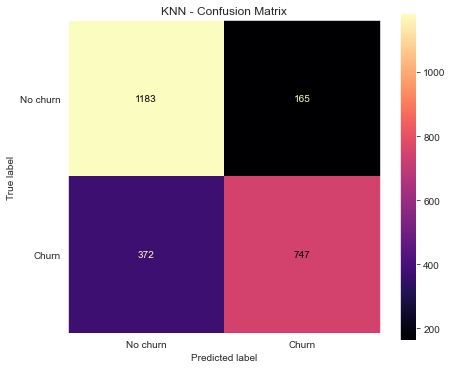

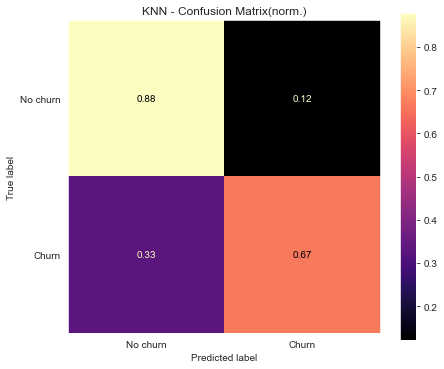

Accuracy Score Test: 0.7823267126064045
Accuracy Score Train : 0.8487028779894609(as comparison)


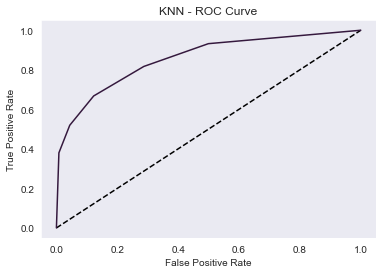

AUC Score(ROC): 0.8557095143767088



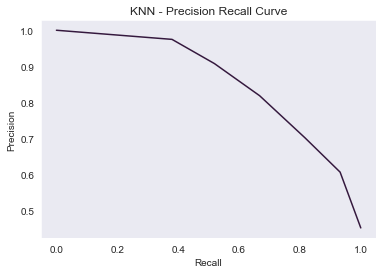

F1 score : 0.7355982274741507 
 AUC Score(PR): 0.8594436636942984



In [76]:
# ploting model evaluations

acc_knn_test,acc_knn_train = confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, y_pred_knn, 'KNN')
roc_knn = roc_curve_auc_score(X_test, y_test, y_pred_knn_prob, 'KNN')
f1_knn,auc_knn,recall_knn = precision_recall_curve_and_score(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')


<a id="8.2"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">8.2 Logistic Regression</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [77]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [79]:
# Predictions - classes and probabilities

y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

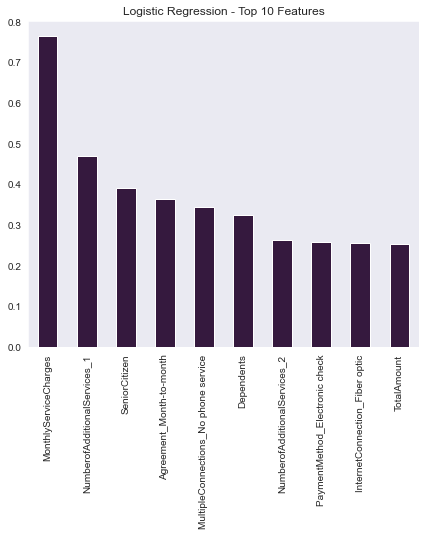

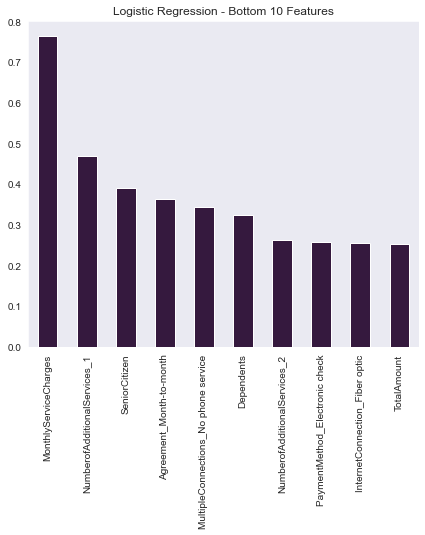

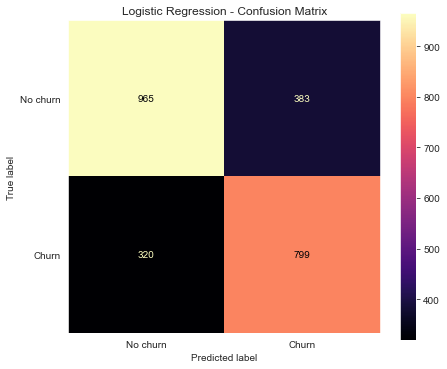

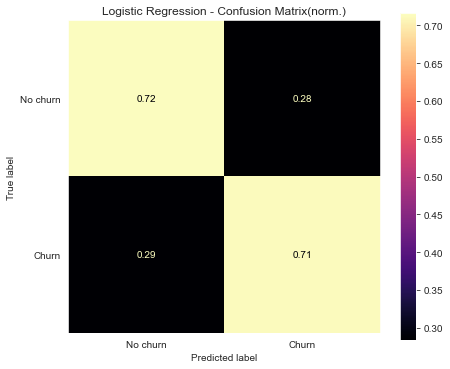

Accuracy Score Test: 0.7150385083096878
Accuracy Score Train : 0.7105796513984597(as comparison)


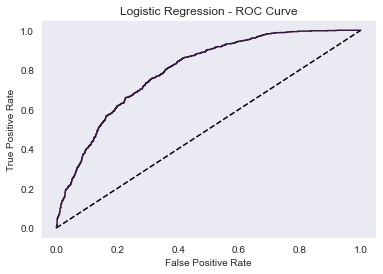

AUC Score(ROC): 0.7959015839173912



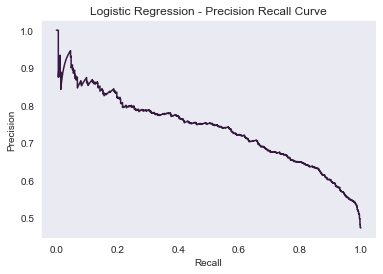

F1 score : 0.6944806605823555 
 AUC Score(PR): 0.7361281670381326



In [80]:
# plotting model evaluations

feature_weights(X1, logreg, 'Logistic Regression')
acc_logit_test,acc_logit_train = confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, 
                                                       'Logistic Regression')
roc_logit = roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Logistic Regression' )
f1_logit,auc_logit,recall_logit = precision_recall_curve_and_score(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 
                                                                   'Logistic Regression')



<a id="8.3"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">8.3 Random Forest</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [81]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [82]:
#making predictions

y_pred_rf = rf.predict(X_test)
y_pred_rf_prob =  rf.predict_proba(X_test)

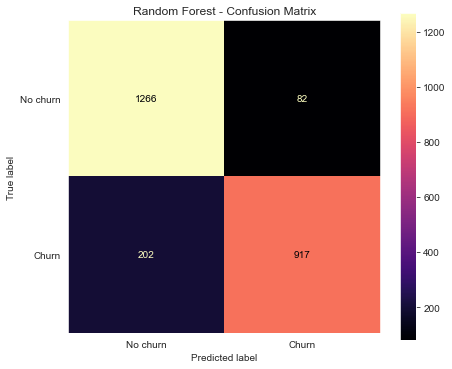

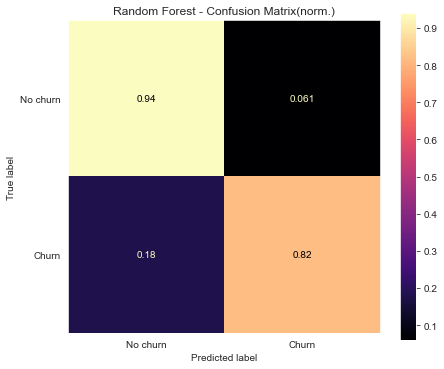

Accuracy Score Test: 0.8848804215646534
Accuracy Score Train : 0.9989866234292664(as comparison)


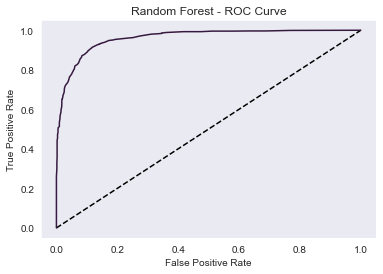

AUC Score(ROC): 0.9609383908375165



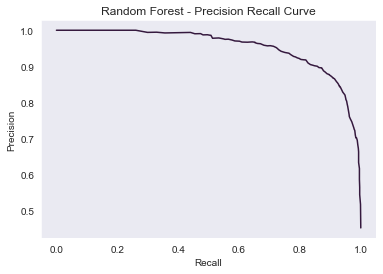

F1 score : 0.8659112370160529 
 AUC Score(PR): 0.9548626874853686



In [83]:
# Ploting Model Evaluations

acc_rf_test,acc_rf_train = confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf, 'Random Forest')
roc_rf = roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest' )
f1_rf,auc_rf,recall_rf = precision_recall_curve_and_score(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')

<a id="8.4"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">8.4 Support Vector Machine</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [84]:
# Support Vector Machine 

from sklearn.svm import SVC

support_vector_m = SVC(kernel = 'rbf', probability = True)
support_vector_m.fit(X_train,y_train)

SVC(probability=True)

In [85]:
# making predictions

y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

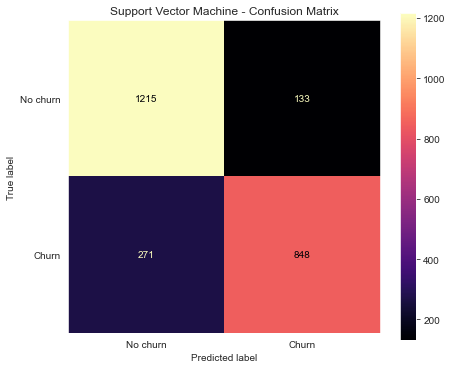

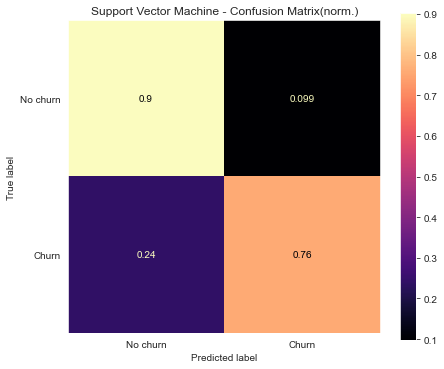

Accuracy Score Test: 0.8362383461694366
Accuracy Score Train : 0.8558978516416701(as comparison)


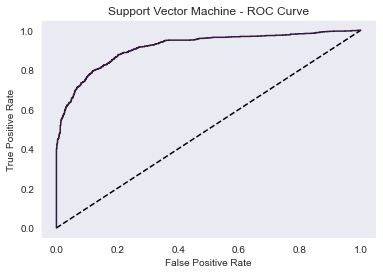

AUC Score(ROC): 0.9143075631856549



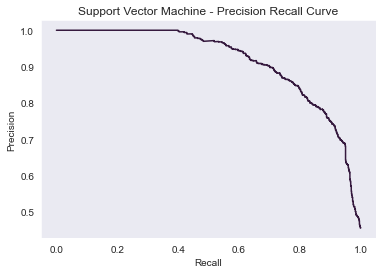

F1 score : 0.8076190476190476 
 AUC Score(PR): 0.9155801910439495



In [86]:
# Ploting model evaluations

acc_svm_test,acc_svm_train = confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 
                                                   'Support Vector Machine')
roc_svm = roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'Support Vector Machine' )
f1_svm,auc_svm,recall_svm = precision_recall_curve_and_score(X_test, y_test, y_pred_svm, y_pred_svm_prob,
                                                             'Support Vector Machine')



<a id="9"></a>
## <p style="background-color:#583759; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;">9. Model Improvement</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

<a id="9.1"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">9.1 K Nearest Neighbors - Tuned</p>



In [87]:
# knn

from sklearn.model_selection import GridSearchCV


knn = KNeighborsClassifier()
knn_gs=GridSearchCV(knn,{'n_neighbors':range(3,10)})

knn_gs.fit(X_train, y_train)

y_pred_knntuned = knn_gs.predict(X_test)
y_pred_knntuned_prob = knn_gs.predict_proba(X_test)

print('KNN best number of neighbours: ', knn_gs.best_params_, '\n')

KNN best number of neighbours:  {'n_neighbors': 3} 



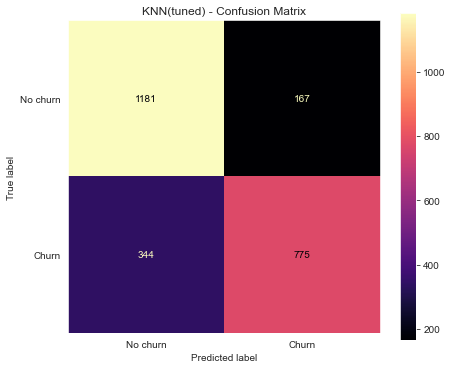

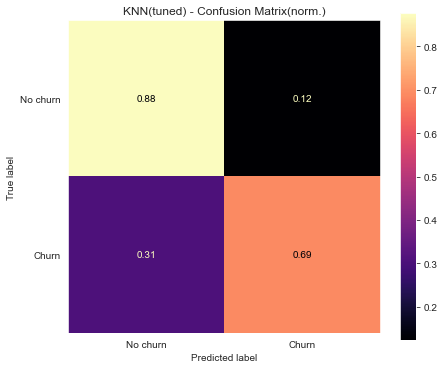

Accuracy Score Test: 0.7928658289420348
Accuracy Score Train : 0.8896432914471017(as comparison)


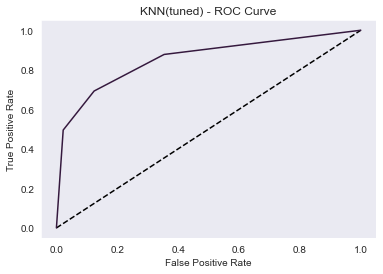

AUC Score(ROC): 0.8529944073635054



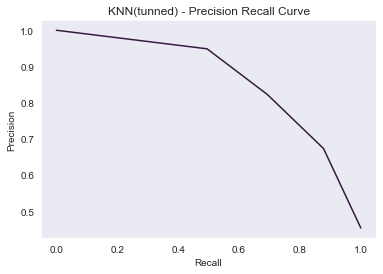

F1 score : 0.7520621057738962 
 AUC Score(PR): 0.8646054035440961



In [88]:
# Plot model evalautions

acc_knn_test_upd,acc_knn_train_upd = confusion_matrix_plot(X_train, y_train, X_test, y_test, knn_gs, y_pred_knntuned, 
                                                           'KNN(tuned)')
roc_knn_upd = roc_curve_auc_score(X_test, y_test, y_pred_knntuned_prob, 'KNN(tuned)')
f1_knn_upd,auc_knn_upd,recall_knn_upd = precision_recall_curve_and_score(X_test, y_test, y_pred_knntuned, 
                                                                         y_pred_knntuned_prob, 'KNN(tunned)')


<a id="9.2"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">9.2 Logistic Regression - Tuned</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [89]:
# logistic regression

param_grid_L1 = {'penalty' : ['l1', 'l2'], 'C': np.arange(.1,5,.1)}
logreg_tuned = LogisticRegression(solver = 'saga', max_iter = 1000)
logreg_tuned_gs = GridSearchCV(logreg_tuned , param_grid_L1, cv = 5)
logreg_tuned_gs.fit(X_train, y_train)

y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)

print('Logistic Regression - Best Parameters: ', logreg_tuned_gs.best_params_)

Logistic Regression - Best Parameters:  {'C': 0.30000000000000004, 'penalty': 'l2'}


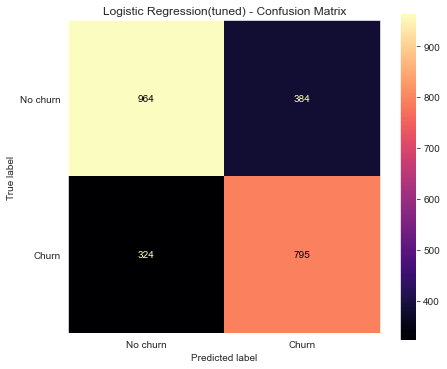

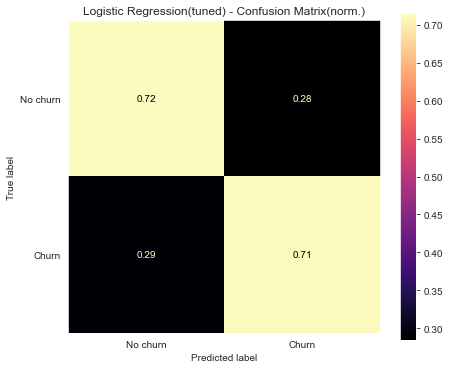

Accuracy Score Test: 0.7130117551682205
Accuracy Score Train : 0.7097689501418727(as comparison)


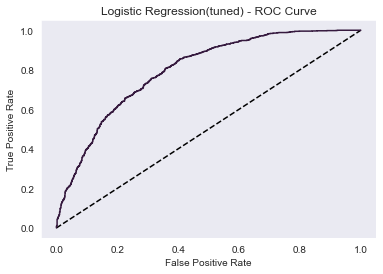

AUC Score(ROC): 0.7963218934879861



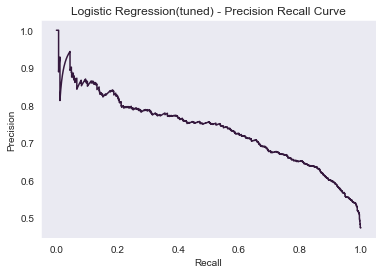

F1 score : 0.6919060052219321 
 AUC Score(PR): 0.7354461061433115



In [90]:
acc_logit_test_upd,acc_logit_train_upd = confusion_matrix_plot(X_train, y_train, 
                                                               X_test, y_test, logreg_tuned_gs, y_pred_logreg_tuned, 'Logistic Regression(tuned)')
roc_logit_upd = roc_curve_auc_score(X_test, y_test, y_pred_logreg_tuned_prob, 'Logistic Regression(tuned)' )
f1_logit_upd,auc_recall_upd,recall_logit_upd = precision_recall_curve_and_score(X_test, 
                                                                                y_test, y_pred_logreg_tuned, y_pred_logreg_tuned_prob, 'Logistic Regression(tuned)')

<a id="9.3"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">9.3 Random Forest - Tuned</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [91]:
# Random Forest 

from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {'n_estimators': np.arange(10,2000,10),
                'max_features': ['auto','sqrt'],
                'max_depth': np.arange(10,200,10),
                'criterion': ['gini','entropy'],
                'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator = rf, param_distributions = param_grid_rf, cv = 5, verbose = 0)
rf_random_grid.fit(X_train, y_train)

y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

Random Forest - Best Parameters:  {'n_estimators': 1240, 'max_features': 'sqrt', 'max_depth': 100, 'criterion': 'gini', 'bootstrap': False}


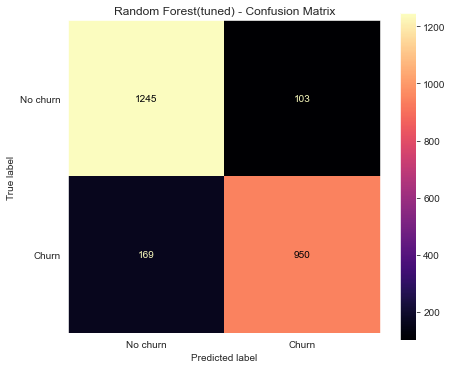

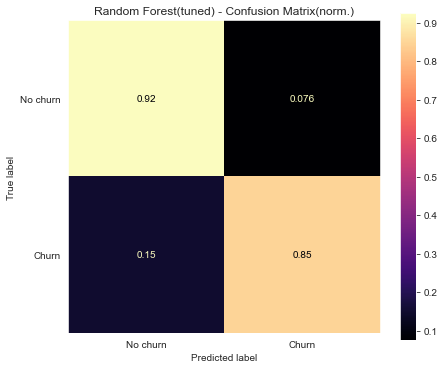

Accuracy Score Test: 0.8897446291041751
Accuracy Score Train : 0.9990879610863397(as comparison)


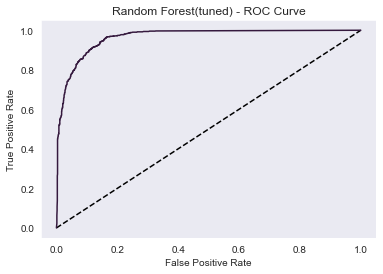

AUC Score(ROC): 0.9638421067984078



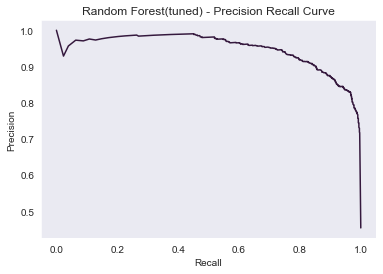

F1 score : 0.8659112370160529 
 AUC Score(PR): 0.9483735689762852



In [92]:
# Ploting Model Evaluations

acc_rf_test_upd,acc_rf_train_upd = confusion_matrix_plot(X_train, y_train, X_test, y_test, rf_random_grid, 
                                                         y_pred_rf_tuned, 'Random Forest(tuned)')
roc_rf_upd = roc_curve_auc_score(X_test, y_test, y_pred_rf_tuned_prob, 'Random Forest(tuned)' )
f1_rf_upd,auc_rf_upd,recall_rf_upd = precision_recall_curve_and_score(X_test, y_test, y_pred_rf, y_pred_rf_tuned_prob,
                                                                      'Random Forest(tuned)')

<a id="9.4"></a>
## <p style="background-color:#7E587E; font-family:newtimeroman; color:#D2B48C; font-size:100%; text-align:center; border-radius:10px 10px;">9.4 Support Vector Machine - Tuned</p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [93]:
param_grid_svm = {'C': np.arange(.1,3,.1)}
svm = SVC(kernel = 'linear', probability = True)
svm_tuned = GridSearchCV(svm, param_grid_svm, cv = 5)
svm_tuned.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9])})

In [94]:
y_pred_svm_tuned = svm_tuned.predict(X_test)

In [95]:
y_pred_svm_tuned_prob = svm_tuned.predict_proba(X_test)

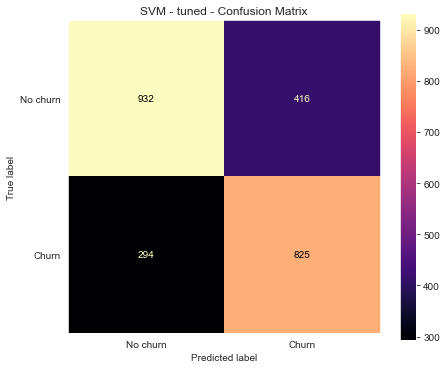

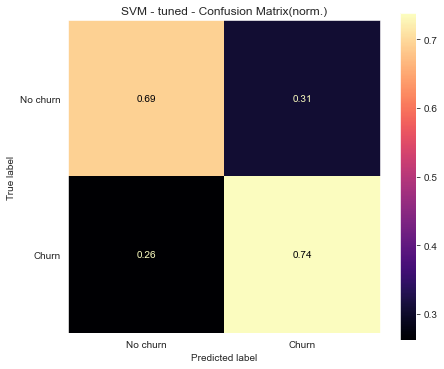

Accuracy Score Test: 0.7122010539116336
Accuracy Score Train : 0.7123023915687069(as comparison)


In [96]:
acc_svm_test_upd,acc_svm_train_upd = confusion_matrix_plot(X_train, y_train, X_test, y_test, svm_tuned, 
                                                           y_pred_svm_tuned, 'SVM - tuned')

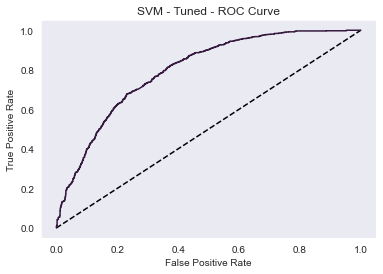

AUC Score(ROC): 0.7967899353757462



In [97]:
roc_svm_upd = roc_curve_auc_score(X_test, y_test, y_pred_svm_tuned_prob, 'SVM - Tuned')

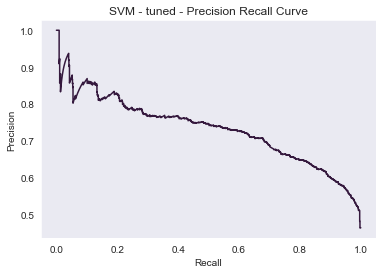

F1 score : 0.6991525423728814 
 AUC Score(PR): 0.732718835402586



In [98]:
f1_svm_upd,auc_svm_upd,recall_svm_upd = precision_recall_curve_and_score(X_test, y_test, y_pred_svm_tuned, y_pred_svm_tuned_prob, 'SVM - tuned')

<a id="10"></a>
## <p style="background-color:#583759; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;">10. Summary </p>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#D291BC" data-toggle="popover">Table of Contents</a>

In [101]:
compare = pd.DataFrame({"Model": ["KNN","Logistic Regression", "Random Forest","SVM","KNN with GridSearch",
                                  "Logistic Regression with GridSearch","Random Forest with RandomizedSearch","SVM with GridSearch"],
                        "AUC Score(ROC)": [roc_knn,roc_logit,roc_rf,roc_svm,roc_knn_upd,roc_logit_upd,roc_rf_upd,
                                           roc_svm_upd],
                        "Recall Scores": [recall_knn,recall_logit,recall_rf,recall_svm,recall_knn_upd,recall_logit_upd,
                                          recall_rf_upd,recall_svm_upd],
                        "F1 Scores": [f1_knn,f1_logit,f1_rf,f1_svm,f1_knn_upd,f1_logit_upd,f1_rf_upd,f1_svm_upd],
                        "Accuracy - Test":[acc_knn_test,acc_logit_test,acc_rf_test,acc_svm_test,acc_knn_test_upd,
                                           acc_logit_test_upd,acc_rf_test_upd,acc_svm_test_upd],
                        "Accuracy - Train":[acc_knn_train,acc_logit_train,acc_rf_train,acc_svm_train,acc_knn_train_upd,
                                            acc_logit_train_upd,acc_rf_train_upd,acc_svm_train_upd],
                        "AUC Score(PR)":[auc_knn,auc_logit,auc_rf,auc_svm,auc_knn_upd,acc_logit_test_upd,auc_rf_upd,
                                         auc_svm_upd]})

In [102]:
compare

,Model,AUC Score(ROC),Recall Scores,F1 Scores,Accuracy - Test,Accuracy - Train,AUC Score(PR)
0,KNN,0.855710,0.667560,0.735598,0.782327,0.848703,0.859444
1,Logistic Regression,0.795902,0.714030,0.694481,0.715039,0.710580,0.736128
2,Random Forest,0.960938,0.819482,0.865911,0.884880,0.998987,0.954863
3,SVM,0.914308,0.757819,0.807619,0.836238,0.855898,0.915580
4,KNN with GridSearch,0.852994,0.692583,0.752062,0.792866,0.889643,0.864605
5,Logistic Regression with GridSearch,0.796322,0.710456,0.691906,0.713012,0.709769,0.713012
6,Random Forest with RandomizedSearch,0.963842,0.819482,0.865911,0.889745,0.999088,0.948374
7,SVM with GridSearch,0.796790,0.737265,0.699153,0.712201,0.712302,0.732719


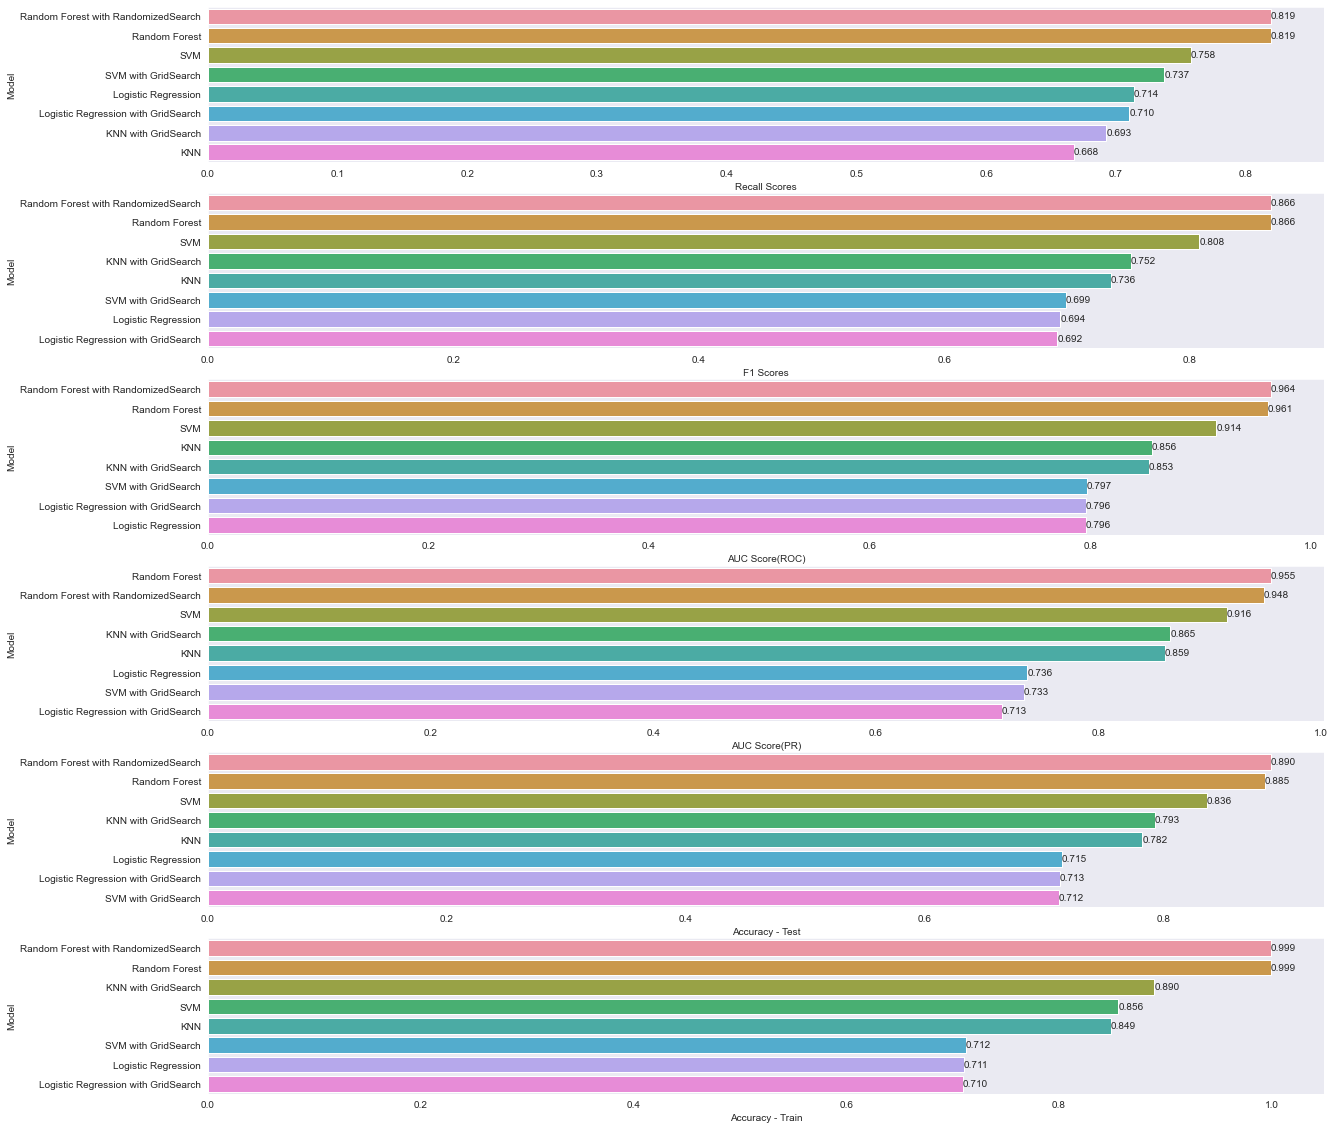

In [104]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                      
        ax.text(width,                             
                p.get_y() + p.get_height() / 2,    
                '{:1.3f}'.format(width),           
                ha = 'left',                       
                va = 'center')                       

fig = plt.figure(figsize=(20, 20))

plt.subplot(611)
compare = compare.sort_values(by="Recall Scores", ascending=False)
ax=sns.barplot(x="Recall Scores", y="Model", data=compare)
labels(ax)

plt.subplot(612)
compare = compare.sort_values(by="F1 Scores", ascending=False)
ax=sns.barplot(x="F1 Scores", y="Model", data=compare)
labels(ax)

plt.subplot(613)
compare = compare.sort_values(by="AUC Score(ROC)", ascending=False)
ax=sns.barplot(x="AUC Score(ROC)", y="Model", data=compare)
labels(ax)

plt.subplot(614)
compare = compare.sort_values(by="AUC Score(PR)", ascending=False)
ax=sns.barplot(x="AUC Score(PR)", y="Model", data=compare)
labels(ax)

plt.subplot(615)
compare = compare.sort_values(by="Accuracy - Test", ascending=False)
ax=sns.barplot(x="Accuracy - Test", y="Model", data=compare)
labels(ax)

plt.subplot(616)
compare = compare.sort_values(by="Accuracy - Train", ascending=False)
ax=sns.barplot(x="Accuracy - Train", y="Model", data=compare)
labels(ax)

## <p style="background-color:#583759; font-family:newtimeroman; color:#D2B48C; font-size:150%; text-align:center; border-radius:10px 10px;">Thank You </p>